In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Cargar el dataset

X, y = load_wine(return_X_y=True)


## Dividir en dataset en Entrenamiento y Validacion

    ##Obtener los índices de las muestras por cada color de vino
indices_color_0 = [i for i, label in enumerate(y) if label == 0]
indices_color_1 = [i for i, label in enumerate(y) if label == 1]
indices_color_2 = [i for i, label in enumerate(y) if label == 2]

    ##Dividir los índices en dos conjuntos para entrenamiento y validación
train_indices_color_0, val_indices_color_0 = train_test_split(indices_color_0, test_size=0.2, random_state=21)
train_indices_color_1, val_indices_color_1 = train_test_split(indices_color_1, test_size=0.2, random_state=21)
train_indices_color_2, val_indices_color_2 = train_test_split(indices_color_2, test_size=0.2, random_state=21)

    ##Unir los índices de cada conjunto de entrenamiento y validación
train_indices = train_indices_color_0 + train_indices_color_1 + train_indices_color_2
val_indices = val_indices_color_0 + val_indices_color_1 + val_indices_color_2

    ##Obtener los datasets de entrenamiento y validación
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

In [3]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 clases en el conjunto de datos Wine

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.build(input_shape=(None, 13))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/400
5/5 [==============================] - 2s 141ms/step - loss: 34.9935 - accuracy: 0.3333 - val_loss: 15.8465 - val_accuracy: 0.3243
Epoch 2/400
5/5 [==============================] - 0s 20ms/step - loss: 8.6893 - accuracy: 0.2837 - val_loss: 10.5740 - val_accuracy: 0.2703
Epoch 3/400
5/5 [==============================] - 0s 22ms/step - loss: 5.4653 - accuracy: 0.3546 - val_loss: 3.4859 - val_accuracy: 0.3243
Epoch 4/400
5/5 [==============================] - 0s 21ms/step - loss: 3.0962 - accuracy: 0.4752 - val_loss: 3.1890 - val_accuracy: 0.4595
Epoch 5/400
5/5 [==============================] - 0s 20ms/step - loss: 3.3769 - accuracy: 0.4255 - val_loss: 3.1744 - val_accuracy: 0.5135
Epoch 6/400
5/5 [==============================] - 0s 25ms/step - loss: 2.4874 - accuracy: 0.6454 - val_loss: 1.5915 - val_accuracy: 0.5946
Epoch 7/400
5/5 [==============================] - 0s 26ms/step - loss: 1.3532 - accuracy: 0.4397 - val_loss: 1.0957 - val_accuracy: 0.4054
Epoch 8/400
5/5 

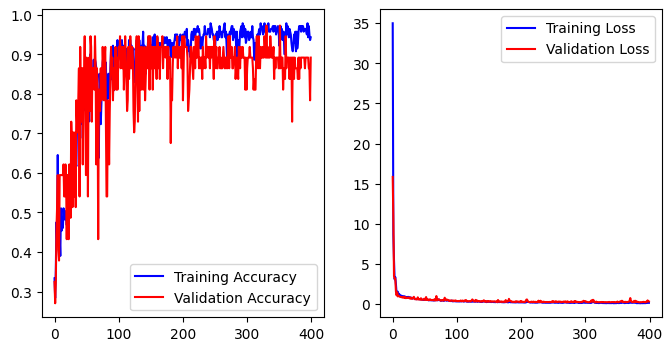

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))
loss = history.history['loss']
val_loss = history.history['val_loss']
f, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(epoch, acc, 'blue', label='Training Accuracy')
ax[0].plot(epoch, val_acc, 'red', label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch, loss, 'blue', label='Training Loss')
ax[1].plot(epoch, val_loss, 'red', label='Validation Loss')
ax[1].legend()
plt.show()

In [6]:
y_pred_train = model.predict(X_train)

5/5 [==============================] - 0s 4ms/step


In [7]:
y_pred_train_labels = []

for i in range(len(y_pred_train)):
  y_pred_train_labels.append(np.argmax(y_pred_train[i]))

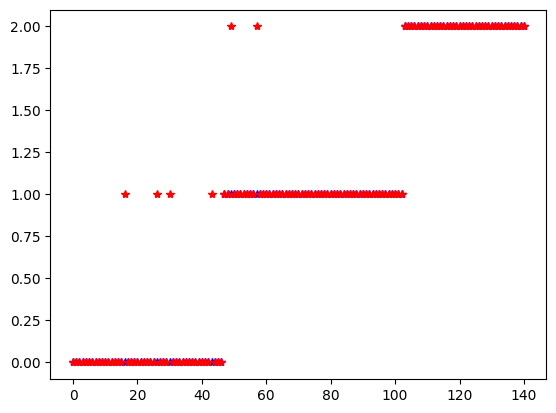

In [8]:
plt.figure()
plt.plot(y_train, '*b', label='Valor Deseado')
plt.plot(y_pred_train_labels, '*r', label='Respuesta de Red')

In [9]:
y_pred = model.predict(X_val)

2/2 [==============================] - 0s 10ms/step


In [10]:
y_pred_labels = []

for i in range(len(y_pred)):
  y_pred_labels.append(np.argmax(y_pred[i]))

In [11]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Pérdida en el conjunto de prueba: {loss:.2f}')
print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')

2/2 [==============================] - 0s 16ms/step - loss: 0.3306 - accuracy: 0.8919
Pérdida en el conjunto de prueba: 0.33
Precisión en el conjunto de prueba: 89.19%


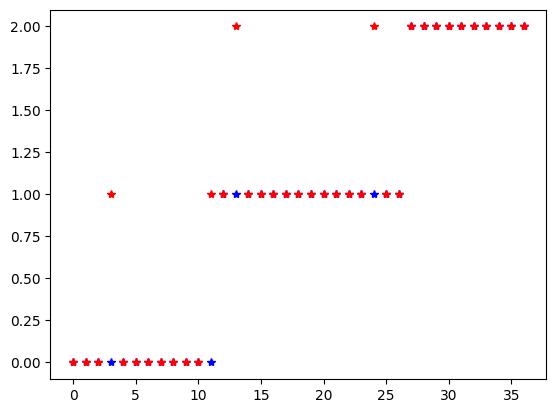

In [12]:
plt.figure()
plt.plot(y_val, '*b', label='Valor Deseado')
plt.plot(y_pred_labels, '*r', label='Respuesta de Red')